<a href="https://colab.research.google.com/github/surajjorwar/Machine-Learning-Tasks-/blob/main/BREAST_CANCER_PREDICTION_VIDEO_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [48]:
#loading data set
df = pd.read_csv('/content/drive/MyDrive/andrew ng /BREAST CANCER DATA/breast-cancer-dataset.csv')

In [49]:
df.head()

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [50]:
#removing rows containing #
df = df[~df.apply(lambda row: any('#' in str(cell) for cell in row), axis=1)]


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               205 non-null    int64 
 1   Year              205 non-null    object
 2   Age               205 non-null    int64 
 3   Menopause         205 non-null    int64 
 4   Tumor Size (cm)   205 non-null    object
 5   Inv-Nodes         205 non-null    object
 6   Breast            205 non-null    object
 7   Metastasis        205 non-null    object
 8   Breast Quadrant   205 non-null    object
 9   History           205 non-null    object
 10  Diagnosis Result  205 non-null    object
dtypes: int64(3), object(8)
memory usage: 19.2+ KB


In [52]:
df = df.rename(columns={'Tumor Size (cm)':'tumor_size','Inv-Nodes':'Inv_Nodes','Breast Quadrant':'breast_quadrant','Diagnosis Result':'diagnosis_result'})

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               205 non-null    int64 
 1   Year              205 non-null    object
 2   Age               205 non-null    int64 
 3   Menopause         205 non-null    int64 
 4   tumor_size        205 non-null    object
 5   Inv_Nodes         205 non-null    object
 6   Breast            205 non-null    object
 7   Metastasis        205 non-null    object
 8   breast_quadrant   205 non-null    object
 9   History           205 non-null    object
 10  diagnosis_result  205 non-null    object
dtypes: int64(3), object(8)
memory usage: 19.2+ KB


In [54]:
df.drop(columns=('S/N'),inplace=True)
df.drop(columns=('Year'),inplace=True)

EDA

In [55]:
df.breast_quadrant.value_counts()

breast_quadrant
Upper outer     65
Lower outer     52
Upper inner     44
Lower inner     43
Upper outer      1
Name: count, dtype: int64

In [56]:
#replacing  'Upper outer ' with 'Upper outer' due to space it is treated as a seperate category
df.breast_quadrant = df.breast_quadrant.replace('Upper outer ','Upper outer')

In [57]:
# assigning numerical value to convert this column into numerical
df.Breast = df.Breast.replace({'Left':0,'Right':1})

In [58]:
#changing data type from object to intiger
df = df.astype({'Inv_Nodes': 'int32'})
df = df.astype({'Breast': 'int32'})
df = df.astype({'tumor_size': 'int32'})
df = df.astype({'Metastasis': 'int32'})
df = df.astype({'History': 'int32'})

# Data splitting

In [59]:
x = df.drop(columns=(['diagnosis_result']))
y = df['diagnosis_result']

In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# using one hot encoding

In [61]:
#encoding the data to convert categorical column to numerical
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first',sparse_output  = False, dtype = np.int32)

In [62]:
X_train_new = ohe.fit_transform(X_train[['breast_quadrant']])
X_test_new = ohe.fit_transform(X_test[['breast_quadrant']])

In [63]:
#combaining the encoded and original values
np.hstack((X_train[['Age', 'Menopause', 'tumor_size', 'Inv_Nodes', 'Breast', 'Metastasis', 'History']].values,X_train_new))

array([[42,  1,  3, ...,  0,  1,  0],
       [23,  1,  3, ...,  0,  0,  1],
       [37,  1,  9, ...,  0,  0,  1],
       ...,
       [21,  1,  3, ...,  0,  0,  1],
       [36,  1,  3, ...,  0,  0,  1],
       [27,  1,  2, ...,  0,  0,  1]])

In [64]:
#combining with column names
original_columns = ['Age', 'Menopause', 'tumor_size', 'Inv_Nodes', 'Breast', 'Metastasis', 'History']

# Concatenate original features with encoded features
combined_data = np.hstack((X_train[original_columns].values, X_train_new))
combined_data1 = np.hstack((X_test[original_columns].values, X_test_new))

# Column names for the combined DataFrame
combined_columns = original_columns + list(ohe.get_feature_names_out(['breast_quadrant']))
combined_columns1 = original_columns + list(ohe.get_feature_names_out(['breast_quadrant']))

# Create DataFrame from combined data
X_train_combined = pd.DataFrame(combined_data, columns=combined_columns)
X_test_combined = pd.DataFrame(combined_data1, columns=combined_columns1)


# Logistic Regressor

In [71]:
#logistic regression  classifier
log_clf = LogisticRegression(max_iter=1500,random_state=42)
log_clf.fit(X_train_combined, y_train)
#predicting the value
y_pred_log = log_clf.predict(X_test_combined)
#evaluating the accuracy
print("Accuracy Score ",accuracy_score(y_test, y_pred_log))
class_report = classification_report(y_test, y_pred_log)
print("classification_report \n ",class_report)

Accuracy Score  0.8780487804878049
classification_report 
                precision    recall  f1-score   support

      Benign       0.85      0.96      0.90        23
   Malignant       0.93      0.78      0.85        18

    accuracy                           0.88        41
   macro avg       0.89      0.87      0.87        41
weighted avg       0.88      0.88      0.88        41



# selecting best parameters

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}

# Creating the grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10,error_score='raise')
grid_search.fit(X_train_combined, y_train)

 #Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best parameters in the model
best_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


# Implementing Random Forest classifier

In [67]:
#RandomForestClassifier
random_forest =  RandomForestClassifier( max_depth=10 ,min_samples_leaf=1, min_samples_split=2, n_estimators=200,random_state=42)


#training  the classifier
random_forest.fit(X_train_combined, y_train)

#predicting the value
y_pred = random_forest.predict(X_test_combined)

#evaluating the accuracy
print("Accuracy Score ",accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print("classification_report \n ",class_report)

Accuracy Score  0.9024390243902439
classification_report 
                precision    recall  f1-score   support

      Benign       0.85      1.00      0.92        23
   Malignant       1.00      0.78      0.88        18

    accuracy                           0.90        41
   macro avg       0.93      0.89      0.90        41
weighted avg       0.92      0.90      0.90        41



# feature importance

Cross-Validation Scores: [0.93939394 0.87878788 0.87878788 0.90909091 0.9375    ]
Feature ranking:
tumor_size: 0.25611341765919365
Inv_Nodes: 0.25156204922266395
Age: 0.1765394379289898
Metastasis: 0.16579952763615263
Menopause: 0.03759306096891397
History: 0.03181420461033319
breast_quadrant_Upper outer: 0.02255918734225394
Breast: 0.021330522662078754
breast_quadrant_Upper inner: 0.018674741399766145
breast_quadrant_Lower outer: 0.01801385056965399


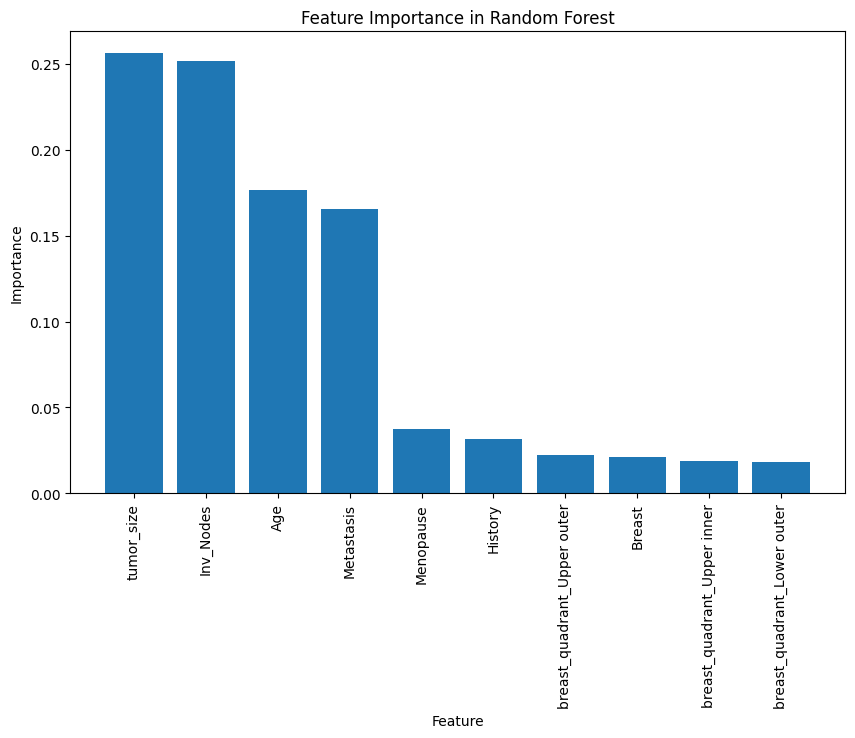

In [69]:
from sklearn.model_selection import cross_val_score
# feature importances using cross-validation
cv_scores = cross_val_score(random_forest, X_train_combined, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)

# Fit the model
random_forest.fit(X_train_combined, y_train)

# feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of features sorted by importance
indices = np.argsort(feature_importances)[::-1]

# feature ranking
print("Feature ranking:")
for f in range(X_train_combined.shape[1]):
    print(f"{X_train_combined.columns[indices[f]]}: {feature_importances[indices[f]]}")

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train_combined.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_combined.shape[1]), X_train_combined.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

# conclusion
# The high accuracy combined with  precision and recall suggests the model is making good predictions for both benign and malignant cases. However, the slightly lower recall compared to precision is due to class imbalance